In [1]:
import pandas as pd
import analysis_toolbox as at
from pattern.nl import sentiment
import numpy as np
#anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust

C:\Users\kpale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
sa = {}
for platform in at.platforms:
    sa[platform] = {}
    for type in at.types:
        sa[platform][type] = {}
        users_df = pd.read_csv(at.working_dir.joinpath(platform).joinpath(platform + '_' + type +'_key_users.csv'))
        df_comments = pd.read_csv(at.working_dir.joinpath(platform).joinpath(platform +'_comment_list.csv'))
        comments = df_comments[df_comments['Author_code'].isin(users_df['id'])]
        cleaned_comments = at.clean_comments(comments)
        polarity=[]
        subjectivity = []
        for c in cleaned_comments:
            polarity.append(sentiment(c)[0])
            subjectivity.append(sentiment(c)[1])
        sa[platform][type]['mean_polarity'] = np.mean(polarity)
        #sa[platform][type]['sd_polarity'] = np.std(polarity)
        sa[platform][type]['mean_subjectivity'] = np.mean(subjectivity)
        #sa[platform][type]['sd_subjectivity'] = np.mean(subjectivity)

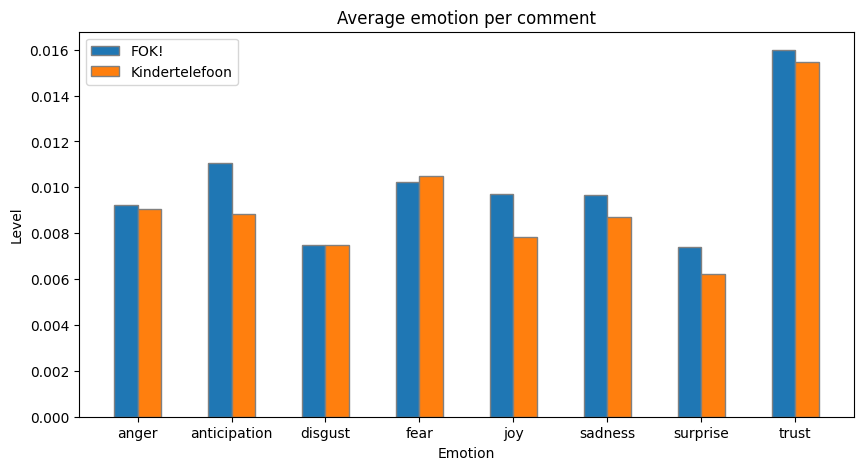

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
# data = {'C':20, 'C++':15, 'Java':30,
#         'Python':35}
emotions_kt = ['Total polarity','Total subjectivity','DI polarity', 'Repliers polarity', ]
mean_kt = list(df_emotions['Kindertelefoon'].mean())
  
emotions_fok = list(df_emotions['FOK!'].columns)
mean_fok = list(df_emotions['FOK!'].mean())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
br_fok = np.arange(len(emotions_fok))
barWidth = 0.25
br_kt = [x + barWidth for x in br_fok]

plt.bar(br_fok, mean_fok, width = barWidth,
        edgecolor ='grey', label ='FOK!')
plt.bar(br_kt, mean_kt, width = barWidth,
        edgecolor ='grey', label ='Kindertelefoon')

plt.xticks([r + barWidth / 2 for r in range(len(emotions_fok))],
        emotions_fok)

plt.xlabel("Emotion")
plt.ylabel("Level")
plt.title("Average emotion per comment")
plt.legend()
plt.show()

In [ ]:
df_comments, _ = at.get_comments('FOK!')

In [ ]:
df_comments[['anger','anticipation','disgust','fear','joy','negative','positive','sadness','surprise','trust']].describe()

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
count,111158.000000,111158.000000,111158.000000,111158.000000,111158.000000,111158.000000,111158.000000,111158.000000,111158.000000,111158.000000
mean,0.009208,0.011060,0.007497,0.010249,0.009691,0.033072,0.033208,0.009645,0.007399,0.015981
std,0.029659,0.036473,0.028013,0.029375,0.036937,0.061884,0.061064,0.027469,0.029995,0.042129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.010236,0.000000,0.000000,0.000000,0.000000
75%,0.004167,0.007692,0.000000,0.007812,0.000000,0.047619,0.046601,0.006494,0.000000,0.017544
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
